In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print('Done')

Done


In [2]:
print(os.listdir("/kaggle/input"))

['pixel-play-26']


In [3]:
DATASET_PATH = "/kaggle/input/pixel-play-26"
print(os.listdir(DATASET_PATH))


['Avenue_Corrupted-20251221T112159Z-3-001']


In [4]:
DATA_ROOT = os.path.join(
    DATASET_PATH,
    os.listdir(DATASET_PATH)[0]
)

print(DATA_ROOT)
print(os.listdir(DATA_ROOT))


/kaggle/input/pixel-play-26/Avenue_Corrupted-20251221T112159Z-3-001
['Avenue_Corrupted']


In [5]:
AVENUE_PATH = os.path.join(DATA_ROOT, "Avenue_Corrupted")
print(os.listdir(AVENUE_PATH))


['Dataset']


In [6]:
DATASET = os.path.join(AVENUE_PATH, "Dataset")
print(os.listdir(DATASET))


['testing_vol', 'training_vol', 'training_videos', 'testing_videos']


In [7]:
TRAIN_VIDEOS = os.path.join(DATASET, "training_videos")
TEST_VIDEOS = os.path.join(DATASET, "testing_videos")

print("Train videos:", len(os.listdir(TRAIN_VIDEOS)))
print("Test videos:", len(os.listdir(TEST_VIDEOS)))

Train videos: 16
Test videos: 21


In [8]:
train_video_ids = sorted(os.listdir(TRAIN_VIDEOS))
print(train_video_ids[:5])


['01', '02', '03', '04', '05']


In [9]:
video_id = train_video_ids[0]
video_path = os.path.join(TRAIN_VIDEOS, video_id)

frames = sorted(os.listdir(video_path))

print("Video ID:", video_id)
print("Number of frames:", len(frames))
print("First 5 frames:", frames[:5])
print("Last 5 frames:", frames[-5:])


Video ID: 01
Number of frames: 644
First 5 frames: ['frame_00700.jpg', 'frame_00701.jpg', 'frame_00702.jpg', 'frame_00703.jpg', 'frame_00704.jpg']
Last 5 frames: ['frame_01359.jpg', 'frame_01360.jpg', 'frame_01361.jpg', 'frame_01362.jpg', 'frame_01363.jpg']


In [10]:
frame_path = os.path.join(video_path, frames[0])
frame = cv2.imread(frame_path)

print(frame.shape)


(360, 640, 3)


(np.float64(-0.5), np.float64(639.5), np.float64(359.5), np.float64(-0.5))

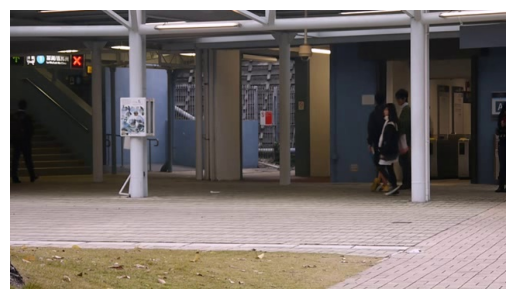

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")


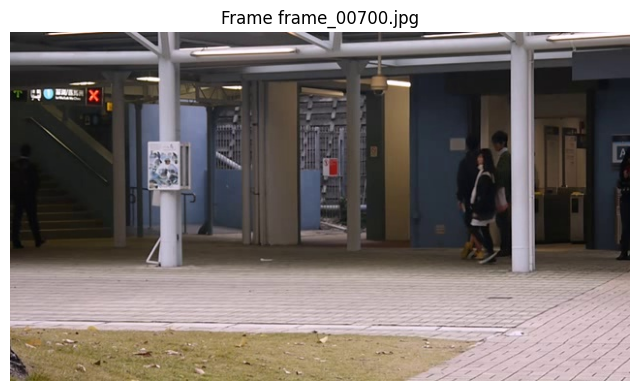

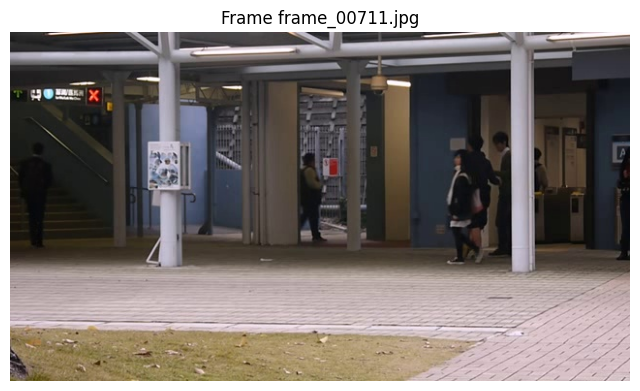

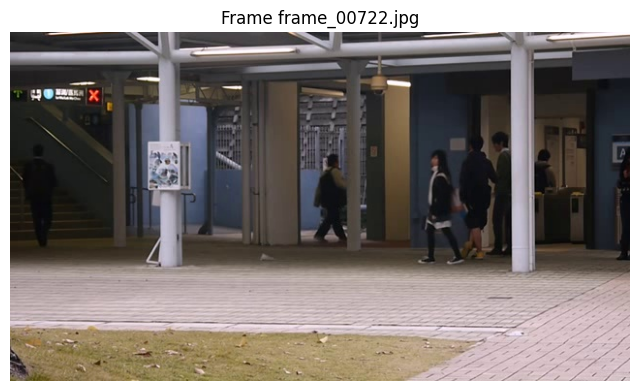

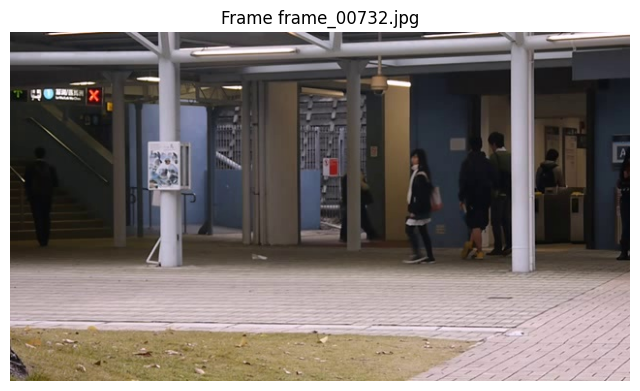

In [13]:
sample_indices = [0, 10, 20, 30]

for idx in sample_indices:
    plt.figure(figsize=(8,8))
    img = cv2.imread(os.path.join(video_path, frames[idx]))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {frames[idx]}")
    plt.axis("off")


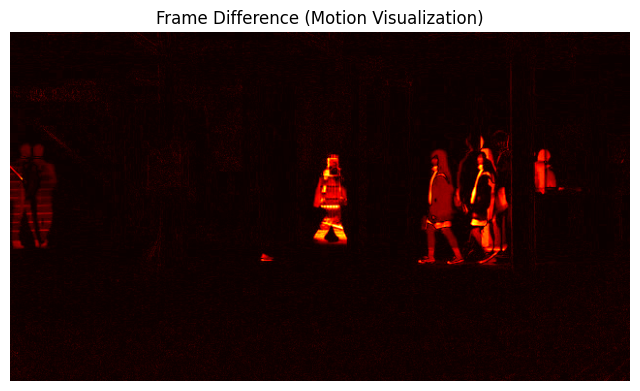

In [12]:
# Visualizing motion via frame difference

frame_a = cv2.imread(os.path.join(video_path, frames[0]))
frame_b = cv2.imread(os.path.join(video_path, frames[20]))

gray_a = cv2.cvtColor(frame_a, cv2.COLOR_BGR2GRAY)
gray_b = cv2.cvtColor(frame_b, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(gray_b, gray_a)

plt.figure(figsize=(8, 8))
plt.imshow(diff, cmap="hot")
plt.title("Frame Difference (Motion Visualization)")
plt.axis("off")
plt.show()


## Observations:
- The background was majorly static i.e. didn't change as such.
- Motion was localised and specialised, some travelled at a larger speed while some travelled at a smaller speed.
- As such no big difference in the frames that are 10 frames apart.